In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal


In [4]:
# Load cleaned data
benin_df = pd.read_csv("../data/benin_clean.csv")
sierra_df = pd.read_csv("../data/sierra_leone_clean.csv")
togo_df = pd.read_csv("../data/togo_clean.csv")

# Add Country column
benin_df["Country"] = "Benin"
sierra_df["Country"] = "Sierra Leone"
togo_df["Country"] = "Togo"

# Combine all into one dataframe
df_all = pd.concat([benin_df, sierra_df, togo_df], ignore_index=True)


C:\Users\HP ENVY\AppData\Local\Temp\ipykernel_13180\332313571.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=df_all, palette="Set2")


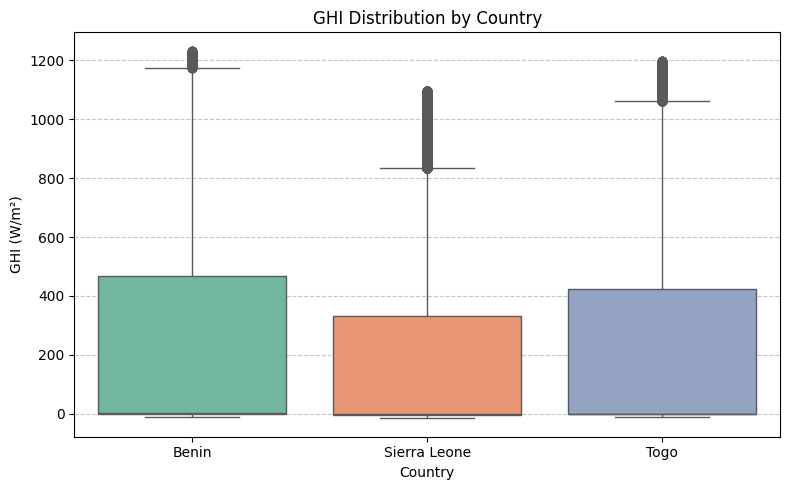

C:\Users\HP ENVY\AppData\Local\Temp\ipykernel_13180\332313571.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=df_all, palette="Set2")


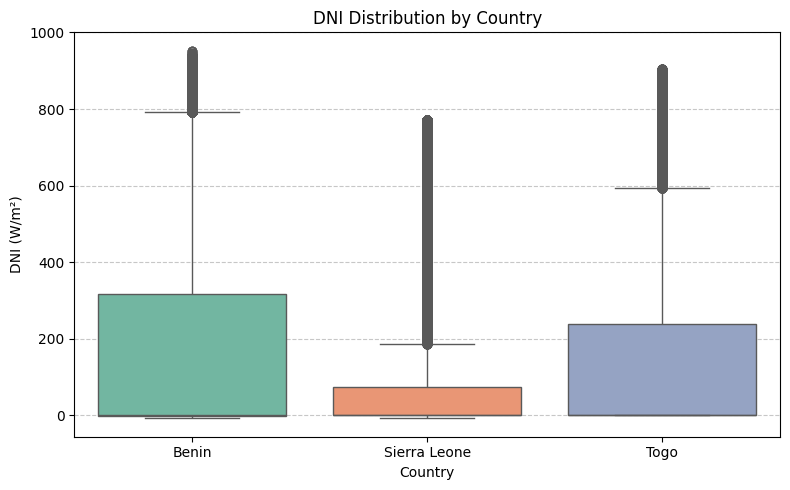

C:\Users\HP ENVY\AppData\Local\Temp\ipykernel_13180\332313571.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=df_all, palette="Set2")


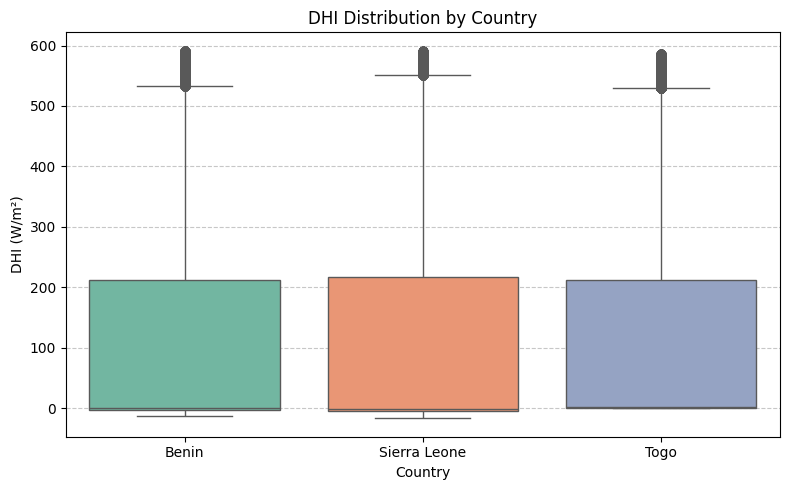

In [5]:
metrics = ["GHI", "DNI", "DHI"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Country", y=metric, data=df_all, palette="Set2")
    plt.title(f"{metric} Distribution by Country")
    plt.ylabel(f"{metric} (W/m²)")
    plt.xlabel("Country")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


In [6]:
summary_stats = df_all.groupby("Country")[metrics].agg(['mean', 'median', 'std'])
summary_stats.round(2)


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  153.69  
Togo          151.57

In [9]:
# Run ANOVA
f_stat, p_val = f_oneway(
    benin_df["GHI"],
    sierra_df["GHI"],
    togo_df["GHI"]
)

print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.5f}")

ANOVA F-statistic: 3833.184
P-value: 0.00000


### 🔍 Key Observations

- 🇧🇯 **Benin** has the **highest average GHI (236.23 W/m²)**, indicating strong overall solar potential, but also shows the **greatest variability** (std = 328.29), suggesting less predictability.

- 🇸🇱 **Sierra Leone** records the **lowest average and median GHI** (mean = 185.00 W/m², median = -0.4 W/m²), indicating **weaker and potentially inconsistent solar energy availability**.

- 🇹🇬 **Togo** has a **moderate average GHI (223.86 W/m²)** and a relatively high standard deviation (317.31), positioning it between Benin and Sierra Leone in terms of both solar potential and variability.


C:\Users\HP ENVY\AppData\Local\Temp\ipykernel_13180\3072787571.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="Blues_d")


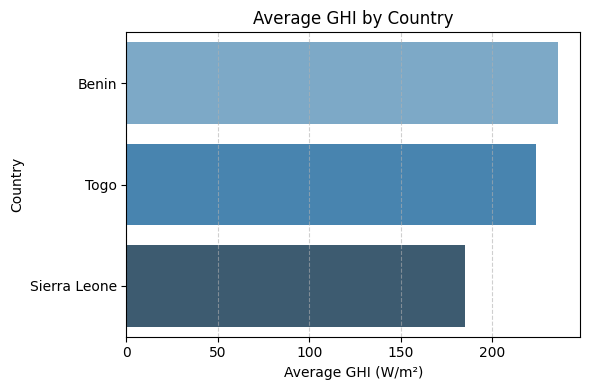

In [10]:
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="Blues_d")
plt.xlabel("Average GHI (W/m²)")
plt.title("Average GHI by Country")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
